#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


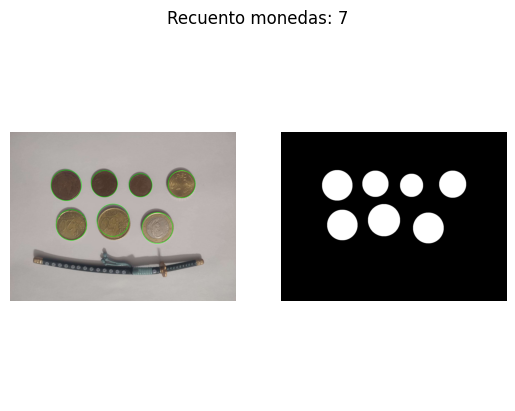

In [14]:
#Conversión a gris
img = cv2.imread('moneditas.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias 

#Localiza Círculos
circ = cv2.HoughCircles(
        gris,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.title('Recuento monedas: ' + str(len(circ[0])))
plt.axis("off")

plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 


plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 


plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


radio:109.2
radio:112.3
radio:108.1
radio:108.5
radio:91.0
radio:78.5
radio:93.7


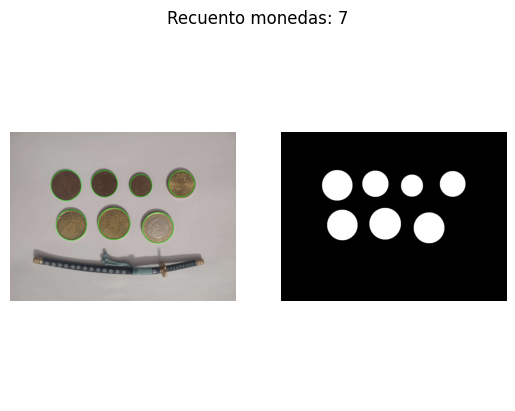

109.2
1 euro
50 céntimos
10 céntimos
10 céntimos
2 céntimos
1 céntimo
5 céntimos
Hay 1.78 € en la imagen


In [150]:
selected_circle = None

# Función para manejar el click del ratón
def on_mouse(e, x, y, flags, params):
    global selected_circle
    if e == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            distance = np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = det
        if selected_circle is not None:
            cv2.destroyAllWindows()

#Conversión a gris
img = cv2.imread('moneditas.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias 

#Localiza Círculos
circ = cv2.HoughCircles(
        gris,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=70,  # radio mínimo
        maxRadius=130,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        print("radio:"+str(det_radio))
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.title('Recuento monedas: ' + str(len(circ[0])))
plt.axis("off")

plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 


plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 


plt.show()

# Crea una ventana para la imagen
cv2.namedWindow('circles', cv2.WINDOW_NORMAL)
cv2.resizeWindow('circles', 600, 600)
selected_circle = cv2.setMouseCallback('circles', on_mouse)

# Muestra la imagen con círculos
cv2.imshow('circles', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

suma = 0
tolerancia = 4.4  # Ajusta la tolerancia según tus necesidades
radio_seleccionado = selected_circle[2]
print(radio_seleccionado)

for det in circ[0]:
     x_coor, y_coor, det_radio = det
     if abs(det_radio - (0.8 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.01
          print("1 céntimo")
     elif abs(det_radio - (0.9 * radio_seleccionado / 1.15)) <= tolerancia+2:
          suma += 0.02
          print("2 céntimos")
     elif abs(det_radio - (1.05 * radio_seleccionado / 1.15)) <= tolerancia+2:
          suma += 0.05
          print("5 céntimos")
     elif abs(det_radio - (1.08 * radio_seleccionado / 1.15)) <= tolerancia+1:
          suma += 0.1
          print("10 céntimos")
     elif abs(det_radio - (1.1 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.2
          print("20 céntimos")
     elif abs(det_radio - (1.2 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.5
          print("50 céntimos")
     elif abs(det_radio - radio_seleccionado) <= tolerancia:
          suma += 1
          print("1 euro")
     elif abs(det_radio - (1.3 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 2
          print("2 euros")

print("Hay", round(suma, 2), "€ en la imagen")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


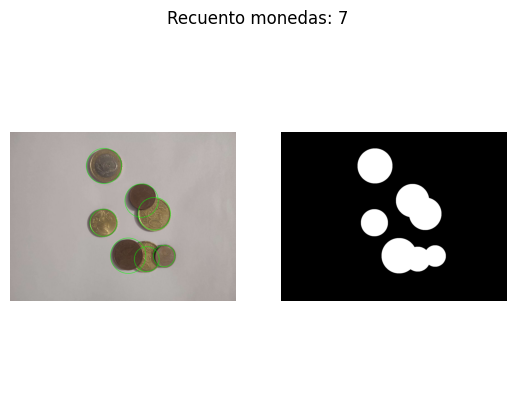

124.2
1 euro
2 céntimos
5 céntimos
20 céntimos
1 euro
1 céntimo
Hay 2.28 € en la imagen


In [39]:
selected_circle = None

# Función para manejar el click del ratón
def on_mouse(e, x, y, flags, params):
    global selected_circle
    if e == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for det in circ[0]:
            x_coor, y_coor, det_radio = det
            distance = np.sqrt((x - x_coor) ** 2 + (y - y_coor) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = det
        if selected_circle is not None:
            cv2.destroyAllWindows()

#Conversión a gris
img = cv2.imread('solaped_coins.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias 

#Localiza Círculos
circ = cv2.HoughCircles(
        gris,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.title('Recuento monedas: ' + str(len(circ[0])))
plt.axis("off")

plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 


plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 


plt.show()

# Crea una ventana para la imagen
cv2.namedWindow('circles', cv2.WINDOW_NORMAL)
cv2.resizeWindow('circles', 600, 600)
selected_circle = cv2.setMouseCallback('circles', on_mouse)

# Muestra la imagen con círculos
cv2.imshow('circles', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

suma = 0
tolerancia = 2.3  # Ajusta la tolerancia según tus necesidades
radio_seleccionado = selected_circle[2]
print(radio_seleccionado)

for det in circ[0]:
     x_coor, y_coor, det_radio = det
     if abs(det_radio - (0.8 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.01
          print("1 céntimo")
     elif abs(det_radio - (0.9 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.02
          print("2 céntimos")
     elif abs(det_radio - (1.05 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.05
          print("5 céntimos")
     elif abs(det_radio - (0.95 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.1
          print("10 céntimos")
     elif abs(det_radio - (1.1 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.2
          print("20 céntimos")
     elif abs(det_radio - (1.2 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 0.5
          print("50 céntimos")
     elif abs(det_radio - radio_seleccionado) <= tolerancia:
          suma += 1
          print("1 euro")
     elif abs(det_radio - (1.3 * radio_seleccionado / 1.15)) <= tolerancia:
          suma += 2
          print("2 euros")

print("Hay", round(suma, 2), "€ en la imagen")